In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
def targetfunc(x):
    return x*x - 5*x + 4

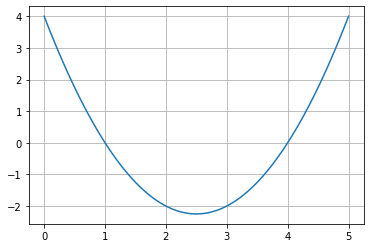

In [6]:
x = np.linspace(0,5,100)
fx = targetfunc(x)
#print(x)
#print(fx)
plt.plot(x,fx)
plt.grid()
plt.show()

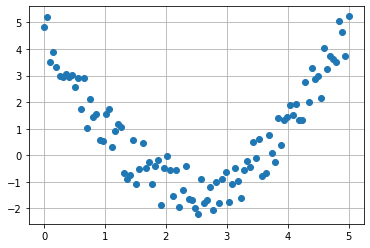

In [7]:
np.random.seed(1)
t = fx+2*np.random.rand(len(x)) 
plt.plot(x,t,'o') 
plt.grid()
plt.show()

In [8]:
from scipy.optimize import minimize

def loss_mse(w,x,t):
    y = w[0] + w[1]*x + w[2]*(x**2)
    val = 0.0
    for n in range(len(x)):
        val = val + np.square(t[n]-y[n])
    val = val/x.shape[0]
    return val

      fun: 0.3379504943330048
 hess_inv: array([[ 4.26663635, -3.37248053,  0.55677276],
       [-3.37248053,  3.62500194, -0.67922266],
       [ 0.55677276, -0.67922266,  0.13624042]])
      jac: array([ 9.31322575e-08, -6.63101673e-07, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 50
      nit: 9
     njev: 10
   status: 0
  success: True
        x: array([ 4.76631239, -4.87712053,  0.98785074])


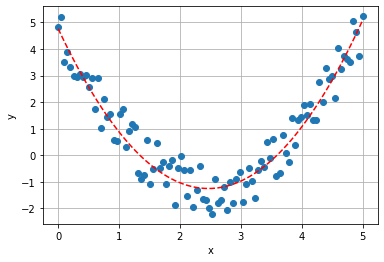

In [10]:
w0 = np.array([1.0,1.0,1.0]) #초기값
_w = minimize(loss_mse,w0,args=(x,t))
print(_w)

ft = np.array([[1.,xval,xval**2] for xval in x])
pred = np.dot(ft,_w.x) #행렬
plt.plot(x,t,'o') 
plt.plot(x,pred,'--r') 
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()